In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../other/frac_merge_peak.csv')
df.shape

(178, 46)

In [4]:
df.columns

Index([u'PropID', u'RSID', u'End_Date', u'Reservoir', u'Completed_Feet',
       u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing',
       u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster',
       u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster',
       u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate',
       u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure',
       u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'PROPNUM', u'XEC_FIELD',
       u'OPERATOR', u'COUNTY', u'STATE', u'M_LATITUDE', u'M_LONGITUDE',
       u'MAJOR', u'SPUD_DATE', u'FIRST_PROD', u'Wet_Gas_EUR', u'Dry_Gas_EUR',
       u'Oil_EUR', u'NGL_EUR', u'Days_Production', u'OIL_Peak',
       u'OIL_Days_to_Peak'],
      dtype='object')

In [5]:
df[[u'PROPNUM', u'Days_Production', u'OIL_Peak', u'OIL_Days_to_Peak']]

,PROPNUM,Days_Production,OIL_Peak,OIL_Days_to_Peak
0,L28IBM1H37,2459,403.712486,49
1,L92IE49R74,2250,406.412843,30
2,LC1JGIXOQC,2168,242.072557,9
3,LC1JPOMGSC,2164,66.625829,47
4,LCAGG2VS2Z,2138,96.092400,29
5,M13MJ1994Y,2122,165.872071,19
6,M22J6KLHGW,2099,419.295800,12
7,M3EKTLUE4G,2049,208.051600,19
8,M83J2IWUGT,1929,328.399900,25
9,M6UG6HD03V,1932,398.066457,21


In [6]:
def plot_production(propnum, df, smoother=7):
    y_oil = df[df['PROPNUM'] == propnum]['OIL'].reset_index(drop=True)
    y_gas = df[df['PROPNUM'] == propnum]['GAS'].reset_index(drop=True)
    y_water = df[df['PROPNUM'] == propnum]['WATER'].reset_index(drop=True)
    x = range(len(y_oil))
    y_oil_smooth = y_oil.rolling(window=smoother, center=False).mean()
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y_oil, label='Oil', color='green')
    ax.plot(x, y_gas, label='Gas', color='red')
    ax.plot(x, y_water, label='Water', color='blue')
    plt.legend()
    ax.plot(x, y_oil_smooth, color='green', linestyle='--')
    ax.scatter(y_oil_smooth.idxmax(), y_oil_smooth.max(), marker='x', s=200, color='black')
    ax.annotate('Peak', (y_oil_smooth.idxmax(), y_oil_smooth.max()), xytext=(y_oil_smooth.idxmax() + 5, y_oil_smooth.max() + 500), arrowprops=dict(arrowstyle="->"), size=18)
    ax.set_title(propnum)
    ax.set_xlabel('Days On')
    ax.set_ylabel('Production')
    ax.set_xlim([0, len(y_oil)])
    ax.set_ylim([0, 8000])
    plt.show()

In [7]:
    df_daily = pd.read_excel('../other/AC_DAILY.xlsx')
    cols = df_daily.columns.tolist()
    cols = [col.replace(' ', '_') for col in cols]
    df_daily.columns = cols

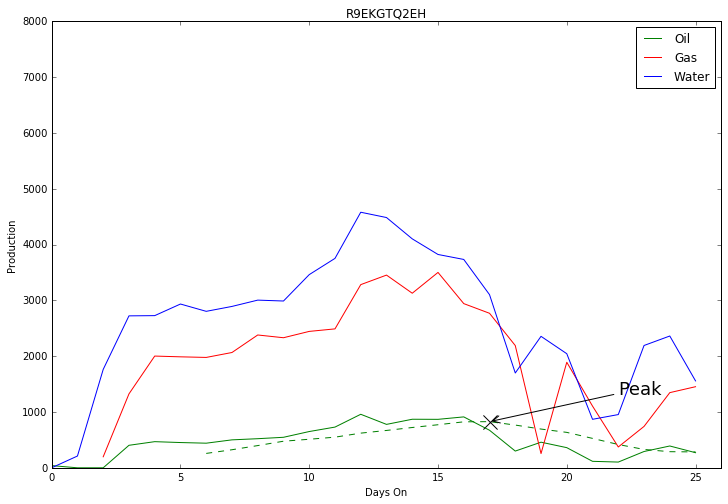

In [8]:
plot_production('R9EKGTQ2EH', df_daily, smoother=7) # 26 days production

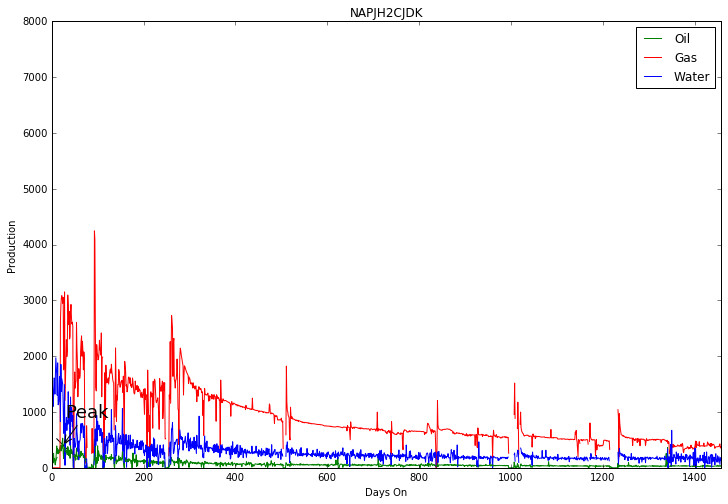

In [9]:
plot_production('NAPJH2CJDK', df_daily, smoother=7) # 1458 days production

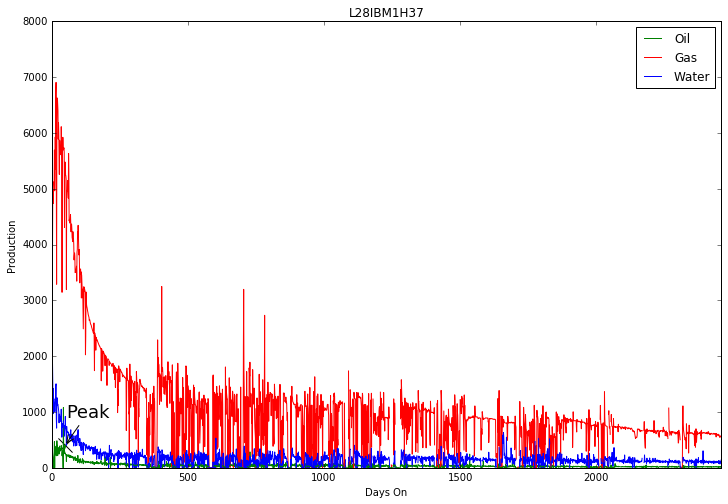

In [10]:
plot_production('L28IBM1H37', df_daily, smoother=7) # 2459 days production

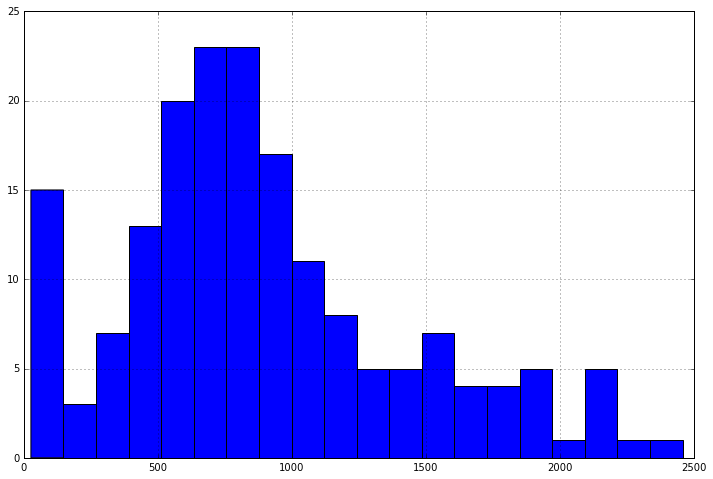

In [11]:
df['Days_Production'].hist(bins=20, figsize=(12,8))

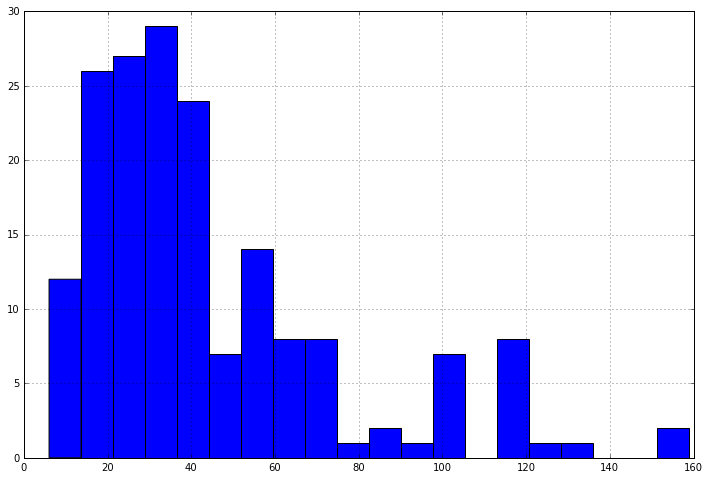

In [12]:
df['OIL_Days_to_Peak'].hist(bins=20, figsize=(12,8))

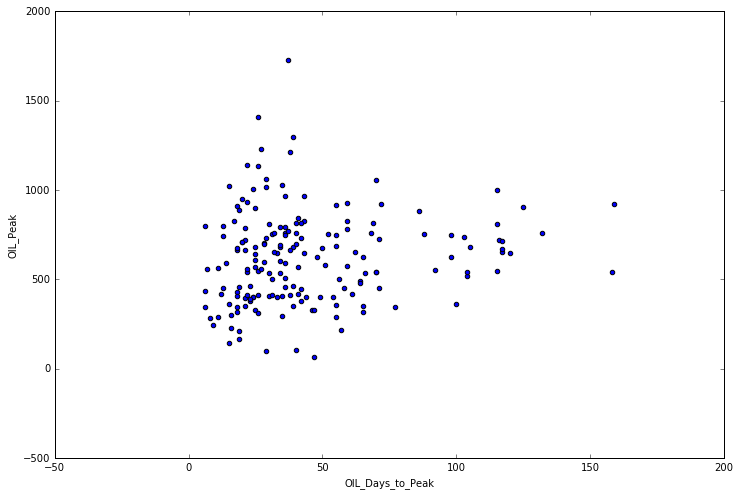

In [13]:
df.plot(x='OIL_Days_to_Peak', y='OIL_Peak', kind='scatter', figsize=(12,8))

In [14]:
df[df[u'OIL_Days_to_Peak'] > 100][[u'PROPNUM', u'Days_Production', u'OIL_Peak', u'OIL_Days_to_Peak']]

,PROPNUM,Days_Production,OIL_Peak,OIL_Days_to_Peak
45,O8SGKE9PE4,1124,518.028457,104
49,OATEQI8S27,1074,540.549086,104
58,P2IG4OAH5G,988,548.757743,115
80,OCLJQC1AZQ,851,760.512429,132
85,OCLK2KJDBD,820,683.116200,105
98,PAML9LI0HK,694,717.748757,116
99,OCLJJ27ICN,738,716.719829,117
109,PAVGTJAB8R,666,923.746914,159
115,PCMGS6EO33,643,655.201514,117
116,PCMHC2F247,643,648.702100,120


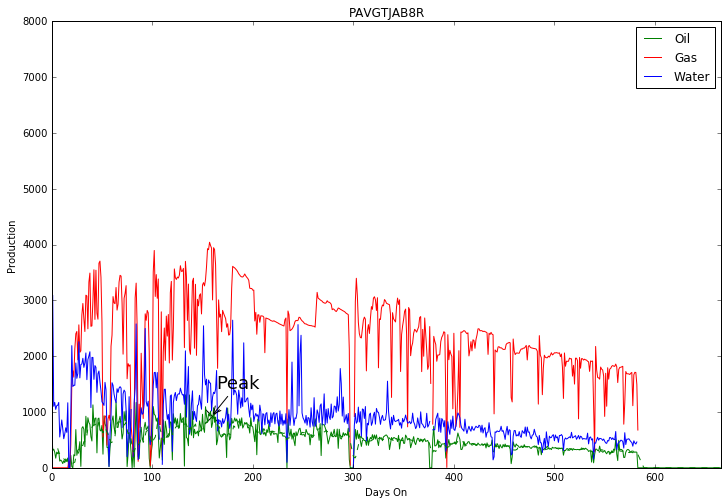

In [15]:
plot_production('PAVGTJAB8R', df_daily, smoother=7) # 159 days peak

In [25]:
df.groupby('XEC_FIELD')['XEC_FIELD'].count()

XEC_FIELD
COTTONWOOD DRAW    14
DIXIELAND          47
FORD, WEST         91
GRISHAM             9
PHANTOM             7
RED HILLS           1
STATELINE           3
TWO GEORGES         6
Name: XEC_FIELD, dtype: int64

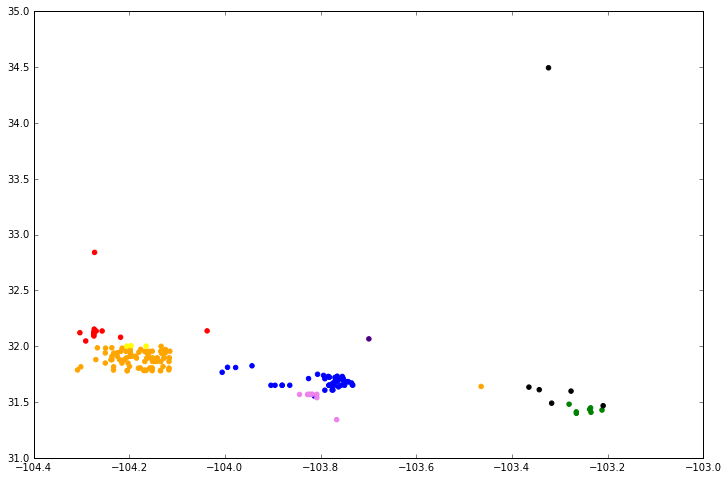

In [37]:
colors = {'COTTONWOOD DRAW':'red', 'DIXIELAND':'blue', 'PHANTOM':'green', 'TWO GEORGES':'black', 'FORD, WEST':'orange', 'GRISHAM':'violet', 'STATELINE':'yellow', 'RED HILLS':'indigo'}
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['M_LONGITUDE'], df['M_LATITUDE'], color=df['XEC_FIELD'].apply(lambda x: colors[x]))

In [26]:
df.groupby('Reservoir')['Reservoir'].count()

Reservoir
Wolfcamp Shale A    89
Wolfcamp Shale C    14
Wolfcamp Shale D    75
Name: Reservoir, dtype: int64

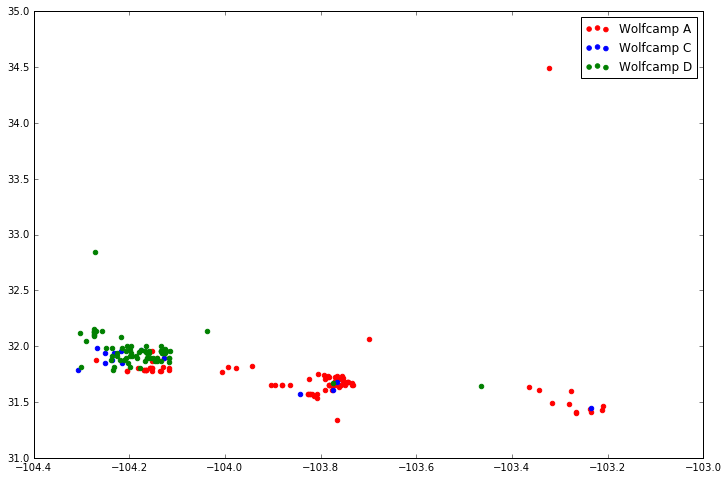

In [35]:
colors = {'Wolfcamp Shale A':'red', 'Wolfcamp Shale C':'blue', 'Wolfcamp Shale D':'green'}
wsa = df[df['Reservoir']=='Wolfcamp Shale A']
wsc = df[df['Reservoir']=='Wolfcamp Shale C']
wsd = df[df['Reservoir']=='Wolfcamp Shale D']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(wsa['M_LONGITUDE'], wsa['M_LATITUDE'], color='red', label='Wolfcamp A')
ax.scatter(wsc['M_LONGITUDE'], wsc['M_LATITUDE'], color='blue', label='Wolfcamp C')
ax.scatter(wsd['M_LONGITUDE'], wsd['M_LATITUDE'], color='green', label='Wolfcamp D')
plt.legend()